# Introdução ao Pandas
O Pandas é um package python desenvolvido sobre o package NumPy.
As suas principais caracteristiscas/funcionalidades são as seguintes:
* Facilidade de lidar com dados em falta (missing data), representados como NaN;
* Permite adicionar/remover colunas em objectos de grandes dimensões;
* Permite o agrupamento dos dados para agregação ou transformação;
* Facilidade em converter dados em estruturas NumPy ou Python (e.g. listas) em DataFrames;
* Atribuição de nomes aos eixos;
* Seleção de dados por nomes de eixos ou indexação;
* Funções que facilitam a leitura/escrita de dados em formatos: CSV, Excel e HDF5;
* Funções especificas para séries temporais.


## Importação do package pandas 
Para ser mais simples a designação do package na chamada de funções, iremos importá-lo atribuindo-lhe a designação pd.

In [1]:
import numpy as np
import pandas as pd

## Estruturas de dados

### Series
Array de uma dimensão que pode guardar dados de qualquer tipo. O conjunto de labels (designação de cada um dos elementos do array) é designado por *index*.
Objetos deste tipo podem ser iniciados a partir de um dicionário, onde as chaves serão usadas como labels.

In [2]:
s1 = pd.Series(np.arange(5))
print(s1)
print("------")
s1.index = ['a','b','c','d','e']
s1

0    0
1    1
2    2
3    3
4    4
dtype: int64
------


a    0
b    1
c    2
d    3
e    4
dtype: int64

In [3]:
s2 = pd.Series(np.arange(1,3,0.2), index = range(10,20), name="serie_obj")
print(s2)

10    1.0
11    1.2
12    1.4
13    1.6
14    1.8
15    2.0
16    2.2
17    2.4
18    2.6
19    2.8
Name: serie_obj, dtype: float64


#### Seleção de valores
Os elementos do objeto Series podem ser acedidos através:
* do uso de [ ] juntamente com o nome das labels   
* atributo *iloc* - com base em índices (0 até tamanho objeto -1)
* atributo *loc* - com base nas labels

Considerando a série anterior, são apresentadas de seguida as 3 formas de selecionar o terceiro elemento da série (valor 2).

In [4]:
print(s1['c'])   # o tipo de dados das labels são int
print(s1.iloc[2])
print(s1.loc['c'])

2
2
2


In [5]:
print(s2[12])   # o tipo de dados das labels são int
print(s2.iloc[2])
print(s2.loc[12])

#Nota:  s2[2] não funciona, pois não há nenhuma label com o identificador 2 

1.4
1.4
1.4


Para selecionar intervalos de valores:

In [6]:
print(s2.loc[11:15])   # seleciona as valores em que as labels estão entre 11 e 15
print("------")
print(s2.iloc[:6:2])   #seleciona até ao índice 6 com saltos de 2
print("------")
print(s2.iloc[-1])     #devolve último elemento da série
print("------")
print(s2.iloc[:-1])     #remove último elemento da série
print("------")
print(s2)

11    1.2
12    1.4
13    1.6
14    1.8
15    2.0
Name: serie_obj, dtype: float64
------
10    1.0
12    1.4
14    1.8
Name: serie_obj, dtype: float64
------
2.8
------
10    1.0
11    1.2
12    1.4
13    1.6
14    1.8
15    2.0
16    2.2
17    2.4
18    2.6
Name: serie_obj, dtype: float64
------
10    1.0
11    1.2
12    1.4
13    1.6
14    1.8
15    2.0
16    2.2
17    2.4
18    2.6
19    2.8
Name: serie_obj, dtype: float64


Para verificar se determinado elemento ou lista de elementos estão no objeto do tipo Series, pode-se usar a função *isin*.

In [7]:
print(s1.loc['a':'d'])
print("------")
print(s1.iloc[3:])

a    0
b    1
c    2
d    3
dtype: int64
------
d    3
e    4
dtype: int64


In [8]:
s1.isin([2,3])

a    False
b    False
c     True
d     True
e    False
dtype: bool

### DataFrame
Um **DataFrame** é uma estrutura de dados com duas dimensões, onde as colunas podem conter diferentes tipos de dados. Estes objetos permitem a definição de labels para as linhas e colunas, tornando-se desta forma a interpretação dos dados mais simples.
São similares às folhas de cálculo do Excel.

Para uma melhor compreensão da estrutura de um DataFrame, vamos criar dois objectos do tipo Series e posteriormente contruir um DataFrame com base nessa informação.

In [9]:
avg_ocean_depth = pd.Series({
                    'Arctic': 1205,
                    'Atlantic': 3646,
                    'Indian': 3741,
                    'Pacific': 4080,
                    'Southern': 3270
})

max_ocean_depth = pd.Series({
                    'Arctic': 5567,
                    'Atlantic': 8486,
                    'Indian': 7906,
                    'Pacific': 10803,
                    'Southern': 7075
})
ocean_depths = pd.DataFrame({
                    'Avg. Depth (m)': avg_ocean_depth,
                    'Max. Depth (m)': max_ocean_depth
}, dtype = float)

ocean_depths



,Avg. Depth (m),Max. Depth (m)
Arctic,1205.0,5567.0
Atlantic,3646.0,8486.0
Indian,3741.0,7906.0
Pacific,4080.0,10803.0
Southern,3270.0,7075.0


In [10]:
## outra forma de criar o mesmo 
ocean_depths2 = pd.DataFrame([[1205,5567],[3646,8486],[3741,7906],[4080,10803],[3270,7075]], 
     index=['Arctic','Atlantic','Indian','Pacific','Southern'],
     columns=['Avg. Depth (m)','Max. Depth (m)'], dtype = float)

ocean_depths2


,Avg. Depth (m),Max. Depth (m)
Arctic,1205.0,5567.0
Atlantic,3646.0,8486.0
Indian,3741.0,7906.0
Pacific,4080.0,10803.0
Southern,3270.0,7075.0


In [11]:
## ainda outra ... se nao especificarmos o tipo ficam valores inteiros ...
avg_ocean_depth = [1205,3646,3741,4080,3270]
max_ocean_depth = [5567,8486,7906,10803,7075]

ocean_depths3 = pd.DataFrame({
                    'Avg. Depth (m)': avg_ocean_depth,
                    'Max. Depth (m)': max_ocean_depth
},  index=['Arctic','Atlantic','Indian','Pacific','Southern'])

ocean_depths3

,Avg. Depth (m),Max. Depth (m)
Arctic,1205,5567
Atlantic,3646,8486
Indian,3741,7906
Pacific,4080,10803
Southern,3270,7075


### Colunas, linhas e dimensão

Para aceder aos nomes das linhas (index)

In [12]:
ocean_depths.index

Index(['Arctic', 'Atlantic', 'Indian', 'Pacific', 'Southern'], dtype='object')

Para aceder aos nomes das colunas/ atributos (columns)

In [13]:
ocean_depths.columns

Index(['Avg. Depth (m)', 'Max. Depth (m)'], dtype='object')

Tipos de dados em cada coluna

In [14]:
ocean_depths.dtypes

Avg. Depth (m)    float64
Max. Depth (m)    float64
dtype: object

In [15]:
ocean_depths3.dtypes

Avg. Depth (m)    int64
Max. Depth (m)    int64
dtype: object

In [16]:
type(ocean_depths.values)

numpy.ndarray

Dimensão

In [17]:
ocean_depths.shape

(5, 2)

#### Funções 
Nesta secção, serão usadas algumas funções que podem ser aplicadas sobre objetos DataFrame,, como por exemplo:
* add_prefix
* tail
* sort_values, sort_index 
* groupby
* isnull
* iterrows


In [18]:
ocean_depths.add_prefix("col ")

,col Avg. Depth (m),col Max. Depth (m)
Arctic,1205.0,5567.0
Atlantic,3646.0,8486.0
Indian,3741.0,7906.0
Pacific,4080.0,10803.0
Southern,3270.0,7075.0


In [19]:
ocean_depths

,Avg. Depth (m),Max. Depth (m)
Arctic,1205.0,5567.0
Atlantic,3646.0,8486.0
Indian,3741.0,7906.0
Pacific,4080.0,10803.0
Southern,3270.0,7075.0


In [20]:
ocean_depths.head(2)

,Avg. Depth (m),Max. Depth (m)
Arctic,1205.0,5567.0
Atlantic,3646.0,8486.0


In [21]:
ocean_depths.tail(2)

,Avg. Depth (m),Max. Depth (m)
Pacific,4080.0,10803.0
Southern,3270.0,7075.0


In [22]:
ocean_depths.sort_values('Avg. Depth (m)', ascending=False)

,Avg. Depth (m),Max. Depth (m)
Pacific,4080.0,10803.0
Indian,3741.0,7906.0
Atlantic,3646.0,8486.0
Southern,3270.0,7075.0
Arctic,1205.0,5567.0


In [23]:
ocean_depths.sort_index(ascending = False)

,Avg. Depth (m),Max. Depth (m)
Southern,3270.0,7075.0
Pacific,4080.0,10803.0
Indian,3741.0,7906.0
Atlantic,3646.0,8486.0
Arctic,1205.0,5567.0


In [24]:
ocean_depths['Frozen'] = [True, False, False, False, True]
ocean_depths.groupby("Frozen").size()

Frozen
False    3
True     2
dtype: int64

In [25]:
ocean_depths

,Avg. Depth (m),Max. Depth (m),Frozen
Arctic,1205.0,5567.0,True
Atlantic,3646.0,8486.0,False
Indian,3741.0,7906.0,False
Pacific,4080.0,10803.0,False
Southern,3270.0,7075.0,True


In [26]:
ocean_depths.iloc[0,1]=np.nan  ## vamos assumir que nao sabemos este valor
ocean_depths.isnull()

,Avg. Depth (m),Max. Depth (m),Frozen
Arctic,False,True,False
Atlantic,False,False,False
Indian,False,False,False
Pacific,False,False,False
Southern,False,False,False


A função *describe* é usada para que se tenha uma análise genérica sobre os dados constantes no objeto DataFrame. Esta função retorna a informação seguinte para cada coluna:
* **count**: frequencia
* **mean**:  média
* **std**: desvio padrão
* **min**: valor mínimo
* **25%**: percentil 25
* **50%**: percentil 50 (mediana)
* **75%**: percentil 75
* **max**: valor maximo

In [27]:
ocean_depths.describe() # NOTA: o elemento Nan é ignorado nas estatisticas

,Avg. Depth (m),Max. Depth (m)
count,5.000000,4.000000
mean,3188.400000,8567.500000
std,1145.671113,1598.878878
min,1205.000000,7075.000000
25%,3270.000000,7698.250000
50%,3646.000000,8196.000000
75%,3741.000000,9065.250000
max,4080.000000,10803.000000


In [28]:
for a,b in ocean_depths.iterrows():
    print(a) 
    print(b)
    print("-------")


Arctic
Avg. Depth (m)    1205
Max. Depth (m)     NaN
Frozen            True
Name: Arctic, dtype: object
-------
Atlantic
Avg. Depth (m)     3646
Max. Depth (m)     8486
Frozen            False
Name: Atlantic, dtype: object
-------
Indian
Avg. Depth (m)     3741
Max. Depth (m)     7906
Frozen            False
Name: Indian, dtype: object
-------
Pacific
Avg. Depth (m)     4080
Max. Depth (m)    10803
Frozen            False
Name: Pacific, dtype: object
-------
Southern
Avg. Depth (m)    3270
Max. Depth (m)    7075
Frozen            True
Name: Southern, dtype: object
-------


### Seleção de dados
Semelhante ao apresentado anteriormente para objetos do tipo Series. Exemplos de como selecionar dados de um DataFrame.

In [29]:
ocean_depths.Frozen

Arctic       True
Atlantic    False
Indian      False
Pacific     False
Southern     True
Name: Frozen, dtype: bool

In [30]:
ocean_depths.loc['Atlantic':'Pacific',:]

,Avg. Depth (m),Max. Depth (m),Frozen
Atlantic,3646.0,8486.0,False
Indian,3741.0,7906.0,False
Pacific,4080.0,10803.0,False


In [31]:
ocean_depths.loc[:,['Frozen']] # para que a continue a ser um DataFrame, Frozen tem de estar dentro de uma lista, se não passa a ser Series


,Frozen
Arctic,True
Atlantic,False
Indian,False
Pacific,False
Southern,True


In [32]:
x = ocean_depths.loc[:,'Frozen']
print(x)
print(type(x))

Arctic       True
Atlantic    False
Indian      False
Pacific     False
Southern     True
Name: Frozen, dtype: bool
<class 'pandas.core.series.Series'>


In [33]:
ocean_depths.iloc[:2,:-1]

,Avg. Depth (m),Max. Depth (m)
Arctic,1205.0,NaN
Atlantic,3646.0,8486.0


In [34]:
ocean_depths.iloc[::2,:]

,Avg. Depth (m),Max. Depth (m),Frozen
Arctic,1205.0,NaN,True
Indian,3741.0,7906.0,False
Southern,3270.0,7075.0,True


In [35]:
ocean_depths[ocean_depths.Frozen == True]
#ocean_depths.Frozen == True

,Avg. Depth (m),Max. Depth (m),Frozen
Arctic,1205.0,NaN,True
Southern,3270.0,7075.0,True


In [36]:
ocean_depths[ocean_depths.iloc[:,1]>7500]

,Avg. Depth (m),Max. Depth (m),Frozen
Atlantic,3646.0,8486.0,False
Indian,3741.0,7906.0,False
Pacific,4080.0,10803.0,False


### Manipulação de DataFrame
o Pandas disponibiliza funções que nos permite fazer alterações ao objeto como por exemplo: 
* insert, drop - adicionar e  remover dados;
* append, combine, join, merge - permite juntar dois objetos DataFrame (ver detalhe das funções);
* stack, unstack - alteração da estrutura que permite a hierarquização das labels

In [37]:
ocean_inf = ocean_depths.copy()
ocean_inf.insert(loc = 2, column="Visited",value = [True,False,True,False,True])
ocean_inf

,Avg. Depth (m),Max. Depth (m),Visited,Frozen
Arctic,1205.0,NaN,True,True
Atlantic,3646.0,8486.0,False,False
Indian,3741.0,7906.0,True,False
Pacific,4080.0,10803.0,False,False
Southern,3270.0,7075.0,True,True


In [38]:
ocean_inf.drop(['Arctic'])


,Avg. Depth (m),Max. Depth (m),Visited,Frozen
Atlantic,3646.0,8486.0,False,False
Indian,3741.0,7906.0,True,False
Pacific,4080.0,10803.0,False,False
Southern,3270.0,7075.0,True,True


In [39]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'), index=['a','b'])
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'), index=['a','b'])
print(df)
print("--------")
print(df2)

   A  B
a  1  2
b  3  4
--------
   A  B
a  5  6
b  7  8


In [40]:
df3 = (df.append(df2))
df3

,A,B
a,1,2
b,3,4
a,5,6
b,7,8


In [41]:
df.join(df2, lsuffix='_df', rsuffix='_df2')

,A_df,B_df,A_df2,B_df2
a,1,2,5,6
b,3,4,7,8


In [42]:
df3.loc[["a"],:]

,A,B
a,1,2
a,5,6


In [43]:
ocean_inf.stack()

Arctic    Avg. Depth (m)     1205
          Visited            True
          Frozen             True
Atlantic  Avg. Depth (m)     3646
          Max. Depth (m)     8486
          Visited           False
          Frozen            False
Indian    Avg. Depth (m)     3741
          Max. Depth (m)     7906
          Visited            True
          Frozen            False
Pacific   Avg. Depth (m)     4080
          Max. Depth (m)    10803
          Visited           False
          Frozen            False
Southern  Avg. Depth (m)     3270
          Max. Depth (m)     7075
          Visited            True
          Frozen             True
dtype: object

In [44]:
pd.pivot_table(ocean_inf, values='Max. Depth (m)', index=['Visited'], 
               columns=['Frozen'])  

Frozen,False,True
Visited,,
False,9644.5,NaN
True,7906.0,7075.0


Nota: O valor de Max Depth quando os atributos Frozen e Visited são False, é a média dos valores do dataframe original.

In [45]:
#repor o df inicial
ocean_depths.iloc[0,1] = 5567
ocean_depths = ocean_depths.drop(labels=['Frozen'],axis=1)
ocean_depths

,Avg. Depth (m),Max. Depth (m)
Arctic,1205.0,5567.0
Atlantic,3646.0,8486.0
Indian,3741.0,7906.0
Pacific,4080.0,10803.0
Southern,3270.0,7075.0


<AxesSubplot:>

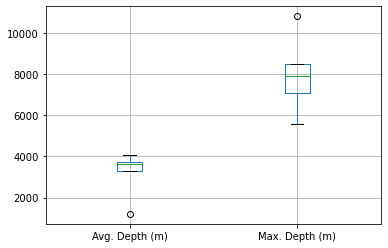

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure();
ocean_depths.boxplot()